In [1]:
import netCDF4
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# file = "/Users/oz/Downloads/oxygen/netcdf/all/5deg/woa13_all_o00_5d.nc"
file = "/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o00_01.nc"
etopoFile = "/Users/oz/Documents/Java OceanAtlas/Java OceanAtlas 5.2-2.1/JOA_Support/etopo20.nc"
#comment

In [3]:
rootgrp = netCDF4.Dataset(file, "r", format="NETCDF4")
rootGrpEtopo = netCDF4.Dataset(etopoFile, "r", format="NETCDF4")

In [4]:
print(rootgrp.data_model)
print(rootGrpEtopo.data_model)

NETCDF4
NETCDF3_CLASSIC


In [5]:
print(rootgrp.dimensions)
print(rootGrpEtopo.dimensions)

OrderedDict([('nbounds', <class 'netCDF4._netCDF4.Dimension'>: name = 'nbounds', size = 2
), ('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180
), ('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360
), ('depth', <class 'netCDF4._netCDF4.Dimension'>: name = 'depth', size = 102
), ('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1
)])
OrderedDict([('ETOPO20XN59_1021', <class 'netCDF4._netCDF4.Dimension'>: name = 'ETOPO20XN59_1021', size = 1081
), ('ETOPO20Y', <class 'netCDF4._netCDF4.Dimension'>: name = 'ETOPO20Y', size = 540
)])


In [6]:
print(len(rootgrp.dimensions.get("lat")))
print(len(rootGrpEtopo.dimensions.get("ETOPO20XN59_1021")))
print(len(rootGrpEtopo.dimensions.get("ETOPO20Y")))

180
1081
540


In [7]:
# comment cell

In [8]:
# iterate the keys in the dimensions dictionary
for dimobj in rootgrp.dimensions.keys():
    print (dimobj)
# iterate the values of the dimen
for dimobj in rootgrp.dimensions.values():
    print (dimobj)
# each value is an object of type Dimension
for dimobj in rootGrpEtopo.dimensions.keys():
    print (dimobj)
# iterate the values of the dimen
for dimobj in rootGrpEtopo.dimensions.values():
    print (dimobj)

nbounds
lat
lon
depth
time
<class 'netCDF4._netCDF4.Dimension'>: name = 'nbounds', size = 2

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360

<class 'netCDF4._netCDF4.Dimension'>: name = 'depth', size = 102

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1

ETOPO20XN59_1021
ETOPO20Y
<class 'netCDF4._netCDF4.Dimension'>: name = 'ETOPO20XN59_1021', size = 1081

<class 'netCDF4._netCDF4.Dimension'>: name = 'ETOPO20Y', size = 540



In [9]:
#listing variables
print(rootgrp.variables.keys())
print()
print(rootGrpEtopo.variables.keys())

odict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 'o_an', 'o_mn', 'o_dd', 'o_sd', 'o_se', 'o_oa', 'o_gp'])

odict_keys(['ETOPO20XN59_1021', 'ETOPO20Y', 'ROSE'])


In [10]:
#get a specific variable using key
aVar = rootgrp.variables.get('o_mn') # a Variable Object
print(aVar)

#Get the ROSE variable
rose = rootGrpEtopo.variables.get('ROSE')
print()
print(rose)

<class 'netCDF4._netCDF4.Variable'>
float32 o_mn(time, depth, lat, lon)
    standard_name: volume_fraction_of_oxygen_in_sea_water
    long_name: Average of all unflagged interpolated values at each standard depth level for volume_fraction_of_oxygen_in_sea_water in each grid-square which contain at least one measurement.
    cell_methods: area: mean depth: mean time: mean
    grid_mapping: crs
    units: milliliters_per_liter
    _FillValue: 9.96921e+36
unlimited dimensions: 
current shape = (1, 102, 180, 360)
filling on

<class 'netCDF4._netCDF4.Variable'>
float32 ROSE(ETOPO20Y, ETOPO20XN59_1021)
    missing_value: -1e+34
    _FillValue: -1e+34
    long_name: RELIEF OF THE SURFACE OF THE EARTH
    history: From etopo20
    units: METERS
unlimited dimensions: 
current shape = (540, 1081)
filling on


In [11]:
# Methods of Variable object?
print (aVar.dimensions)
print (aVar.datatype)
print (aVar.ndim)
print (aVar.size)
print()
print (rose.dimensions)
print (rose.datatype)
print (rose.ndim)
print (rose.size)

('time', 'depth', 'lat', 'lon')
float32
4
6609600

('ETOPO20Y', 'ETOPO20XN59_1021')
float32
2
583740


In [12]:
#enumerating values of a Variable
# length of a dimension??
oVar = rootgrp.variables.get('o_mn')
latDimLbl = oVar.dimensions    #this is a list of the dimension names
print(latDimLbl)

# get lat dimension
theLatDim = rootgrp.dimensions.get("lat")
latSize = theLatDim.size
print(latSize)

# the lon dimensions
lonSize = rootgrp.dimensions.get("lon").size
print(lonSize)

#iterate the netcdf array at the surface (0)
for lt in range(latSize):
    for ln in range(lonSize):
        print(aVar[0, 0, lt, ln], end="")
    print()

('time', 'depth', 'lat', 'lon')
180
360
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

7.7799997--7.1557.4189997----8.0047.965----8.3757.785--8.1057.928.0257.585----8.017.976.456.77.99----8.1657.9--8.2005318.008714----------8.14----8.31------------7.89----7.3075------7.3557.938.12--------6.83--------7.717.25--7.5657.2--7.517.797.927.84--8.1615147.937.83--7.7874067.837.67.777.67----7.99------7.94806588.02--6.9782--------7.927.8957.975------------------------------------8.547098--9.1162928.315289--------------6.71--7.0249996------8.17----7.99----7.96----------------------7.745------------7.24294578.0964327.3889987.0541005--7.847.918.665----7.83--7.8858.17--7.89----7.72000038.377.67--7.72--8.12--8.167.27833378.1983348.24916658.2073337.9663337.90888838.1333337.565--8.15--8.43--8.28.167.877.965--8.375--8.4113237.877242----------------------------------------------------------------------------------8.518.065001------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----7.555----------7.657.92650037.4063334--7.35--------8.035--7.19--7.61----7.8625--8.037.95----7.8715734--8.163333----7.58------8.23--------7.57----7.9700003----------7.840559--7.73--------------------------7.6057.397.28--------7.3696917.40736637.757.75--------7.3666677.43----7.677.29000047.047.3582167.34160047.26--7.08.168.19--7.7557.847.6357.8600006--7.72500047.827.587.787.98--7.6--7.89257.85727557.9980957.98333367.71295077.8482767.70459467.794294----------7.6398757.76871447.6637977.590247.49689348.057.64499958.037.8357.727.79--7.70536667.835657.95813378.29----------8.11------7.987.157.987.93--------7.98----7.775----8.368.8362858.077.98--7.8957.64--7.46--7.57--------7.547.87562757.527.597.93000038.057.897.518.038.338.17----7.63----7.92----7.67.7366667.537.7----7.47.65--7.5--8.1759167.77984437.877.847.617.7147458.2457.637.8457.417.82416637.857.797.785--7.6800003--7.277.87.8766677.87.848.177.61750037.717.8366157.677.4657.548.07.67--7.725--7.678.3383338.0149998.177.9733334--8.026258.27

------6.46--6.4565--6.3--6.456.69----------------7.096.846.686.86--6.84--------6.73446.7343707--6.6499996--6.665--6.6425--6.80580236.80567076.77222256.646667--6.4933333------6.5----------6.89086.929024------------------------------6.675------------6.99--6.669674--6.69989976.6306562--6.78902056.6815--6.66539966.58448036.546.58819636.55960046.5481005--6.67--6.5325.376.506756.04439976.73058036.54119976.45161156.4338136.455226.6145--------------6.45086676.54413276.845226.957557.1656.9716676.7156.97906647.1160577.11184026.72180036.9938896.877.0256.887.1056.94749987.19466647.098757.323757.47333347.243757.44375047.63857.6571247.72020677.6503137.5441337.66239937.7450787.7543767.7757727.6959667.63249977.42499977.52499967.69799957.7557.5366677.63--7.577.2299995--7.86--7.757.64--8.0199995------------7.73--------------------7.68489937.8580018.00847.91387.92750077.778.12--8.317.7857.9258.348.12--7.757.78--7.84--7.8191677.7172257.857.8357.877.76833347.785--7.82--7.5235547.52502257.39--7.31--7.977.80

5.99599935.923755.83550025.845.81993255.58334835.52666665.835.7366665.845.73499975.88755.845.775.8855.81999975.785.926.12135365.92666676.2166667--5.9700003--6.226667--6.145.8356.69499976.0573487--6.2456.696.096.435.99666646.156.766.056.05500036.0856.026.16.0856.2439336.1726.06256.03333336.4783336.23083356.1309556.2366676.32756.09833346.396.1856.17026666.15026666.58333356.50555566.07039986.1655.986.16.24856.046.39333346.44499976.166.426.156.23256.446.21109346.4490666.015.9903126------5.93500045.9155.94--6.05--6.1--6.3355.836.20999966.09696.06636.336.3466675.9956.05644046.082356.063926.05517775.9383336.4356.0755.9916676.20354186.586--------------------6.1422226.53666645.80756.7418457.1118277.01800546.59624966.886.804256.19456.0922225.9706256.1116666.2455565.815.835--6.376.61833336.336.21--6.896.82--6.656.74----6.24------6.2314726.111904------5.9136--------6.4044----6.72000036.80769826.1264----------6.4319506------6.3952----------6.170486.22--6.7397566--6.5407996------6.6404--6.827.236.46

5.52499965.315.565.54----5.06--5.47000035.2623175.3576283----5.2445.485----6.17126.14885.27------5.7----------5.6540785.331703----------------5.6655.525.4849997----5.64333345.7749335.68599945.68659975.83525.545--------5.95000035.77439985.7735996----5.69------5.7565.76--------5.6955.66----5.41----5.1583247------5.595.685.55----5.55----------5.43770035.57249985.1166675.546325.065.335--5.47------5.5355.85.30333335.566255.738----------------------------------5.83383375.87277755.94530875.513735.23718645.2895025.40366655.50333365.2471435.28155.4704425.57666645.3996335.43000035.665.875.39333345.685.896.025.1198------5.495.665.406667------5.6726345.232917--5.5--5.4656--------------------5.27855.4383475.445.585.8744--------5.5055.40485.806701--5.355--5.415.5245.465--5.06665.34239965.36045.7055.33635.5255.44485245.38756665.4448185.4222725.4151595.45648345.51033645.1883355.2051255.223924.97373345.08999975.04466635.544.8451166--5.465.295.20525.44319965.4309335.33----4.93359955.4207997--5.35919955.

5.30500035.065.1564.968----5.08----5.065.0194664----------------4.894.95------5.31--------5.12276274.893236----------4.85----4.6----------5.400462----5.3479996--------5.28------5.3199997------------------------5.29----------4.9850416------5.365.091893--5.35.24334535.33--5.21--5.045.0633335.165.1215.085.036667--5.07255.24685.15755.45333345.325.3555.35.60000045.75333365.76666645.856255.7902775--------------------------------------------5.17597635.0397725.03183365.2758335.26166635.545.385.236666--5.345.1227295.2705845.2640825.0943335.275.3207235.3138375.285.365.17081175.3654537--5.5106287--5.02090025.05837--5.2650485--5.310951--5.5106287----5.47620155.21919975.2249595.52210435.5106287--5.43947945.2808332--5.46816835.2157035.4371845.52210435.3624255.3883195.2430825.26500035.3576075.195.32419255.25.095.21925.335.27100665.2030735.251755.22825575.35148335.47431665.50611075.61352065.9659452----------------------------4.90449574.91746664.9261334.816--4.97000035.52165.25.18565.15.385.03725.00645

4.7574997--4.734.534.3599997--4.444.414.6234.59160234.79------4.664.715----4.59500034.7201366------------4.54--4.6564.75694374.612856----4.674.834.66----4.754.4154.764.564.64.8625----4.7002224.825226------------4.65------4.71--4.74----------------5.024.8------4.8599997--5.0699615--------5.12----4.9633335.095.115.1099997------4.924.89675.185.15.265.665.2355.00255.0458335.07255.48555565.34754.90754.8916675.10255.167755.2327545.3560285.24788--------------------------------------------------------------4.944.984.6--4.885--4.924.93000034.6392734.83------4.728598------------4.7587----------4.8093----4.8782997--4.67--------4.6--5.21--5.4624305--5.26----5.15.125.2495.3097625.5739295.42092945.2444673----------------------------------------------4.8009614.47833354.68000034.294.68000034.724.6645114.790919------------4.67807534.7354.76254.72169974.80256654.7374.9584354.8942254.6126674.77--4.484.48818254.7336424.78690434.7435434.63599974.7978--4.75--4.5355997----4.824.53--4.715--4.9082-------------

4.574.6954.4725--4.4736174.40254.4354.37--4.4742844.4777244.453074.45744.45054.45969964.53853374.44819974.495----4.64--4.47--4.554.525--4.384.56702234.605954.6235--4.64--4.4089624.6354.66333344.615--4.62333354.424.6433334--4.31--4.9735664.8------4.524.83--4.515----4.39------4.72------------4.81--4.87--4.78----4.794.815.04701044.78----4.585.02----4.77499964.6800003--4.84500034.994.8466674.78666644.87460044.9076665.014.9860114.84254.9859534.84166675.04119635.1351845.16905744.7196803------------------------------------------------------------------------------------4.1654.53333334.52468544.414.984.52463254.57254.354.634.7027784.5774544.53559974.55----4.664.7173------4.728889------4.965.08666664.78169974.75645.01--4.8754.365.0055.22500045.024.744.92165234.81999974.89999965.034.90324974.9090254.83926634.51984.79106664.85676674.79281044.7696684.8854544.9758654------------------------------------------------------4.70069554.6468394.77491244.6817874.81805754.78075364.704764.62625034.6754.65166

4.60666664.784.6275--4.52614.68999964.2654.72000034.60333354.69254.47000034.55202534.824.72--4.414.68754.4049997--4.66333344.644.67----4.724.6033334.5254.73--4.62466674.605----4.57333335.35--------4.54394054.6542583------4.85989954.6605997----4.47------4.794.7799997----------4.94--4.62254.344.574.27--4.834.6208334.68000034.7253942--4.69----4.724.53----4.534.81254.87--4.61254.634.754.99415.137354.81621034.94067864.78884.83666664.672134.774354.98787984.92042974.8515714.88008364.65803344.8194017----------------------------------------------------------------------------------4.6467784.6564.57236154.59914.59017324.4941224.5577784.54754.164.51691684.624.56999974.67700054.64607144.73977334.67540034.7543114.70294334.764.55460364.7416674.8156254.8450003--4.647917--4.81884964.6754.85333354.89436244.9702524.63000064.7890196--4.94020844.72660454.71600064.67--4.68523034.72735454.67376665.415.1573634.76466664.74367574.85754734.60254.78480864.836103---------------------------------------------------

4.5508334.344.44.43785--4.525--4.78--4.5----4.68000034.584.6854.46----4.724.72533374.4754.64.68--4.69254.624.724.514.6361814.63754.665------4.62--------4.574.635467----------4.90874964.914.7----------4.78--------4.99250034.7254.738333----4.89--4.67359974.74166634.7119994--4.564411--4.69222264.534.773754.72333344.574.74254.824.61--4.80333334.6608334.44.694.77499964.484.58000044.67--4.594.5354.6079794.5881544.74333334.70999964.84500034.72250034.7666674.77666664.43148854.55291654.599763--------------------------------------------------4.684054.6188754.6302784.74111134.69537074.7897384.68041664.8243754.80851174.73510034.89958334.66000034.694.581254.79285764.7383334.67584134.6173334.6416674.78666644.834.6723514.6650374.695286--4.6307664.7007414.654.6792754.6656684.650374.87238074.81830025.02--4.14.84.67070534.6613334.6154.594.7423344----------------------5.14788684.60444454.944.6242576----------------------------------------------------------------------------------------4.6578754.67553144.

------------4.31--4.86----4.7----4.684.74.594.854.72000034.6754.614.76500034.7900004--4.67666674.84666634.8854.74.734.805------4.81----------4.663254.705----4.75333364.79581644.90333374.89754.83847244.87754874.9264.8241674.94666674.84333374.774.8254.8054.924.7866674.79254.88333374.73466634.713754.75999984.654.75333364.764.74.754.66599944.71257454.714.68500044.644.544.67754.66333344.6962964.664.50999984.6454.59754.70644.61750034.22254.51316644.69366654.66916664.77754.725358----------------4.7054.5861114.72000034.49500044.4954.6533337--4.374.22500044.54454.54754.35444454.578754.47500044.554.6954.67190174.53195244.56071424.53283364.48903134.6260567--4.6228574.53574664.5454174.62854.6584.68754.52274.6739624.60499954.778754.6742864.72057444.64.79129654.74666644.94.8050003--4.715.014.77--4.54--4.895--------4.8374584.87416654.77220964.984.7854.885.044.90425444.8351054.84595255.01330954.8928574.85166654.782629-------------------------------------------------------------------------------------

4.6949997----------4.685--4.554.81333354.90134.95.084.634.87----4.895--4.77254.824.78945164.78827574.8066494.864.7999965.158754.72530754.675.02666664.96000055.285.1854.8--------------4.865.05--5.09612465.1773--5.25----5.28--------5.2855.25--5.39000035.2355.225.10000044.5855.1365.226254.80199964.85450034.6861674.8779274.78457834.70178464.85167844.7323334.742889------------------4.59200434.43166644.5271434.5111674.50119454.52832374.5363894.507254.6416674.5900524.57680274.5368894.589125------------------4.67--4.6971674.60616644.6534.61833334.75766664.58666664.70066644.62948374.82249984.77499964.544.61750034.6964.5454.75833374.7266674.576--4.47733354.6811664.8617244.76033354.5844.78954.644.6864.51675034.63354.694.6733334.8468754.77--4.63--4.91------------4.95254.9355.0541674.94471174.92--5.25666674.965.165.1943595.1255.5025.21452675.240922------------------------------------------------------------------------------------------------------------4.3799148------------------------------------

5.14333344.60999975.1--5.04.91--5.33--5.2019444--4.761--5.244.8855.08999974.665.264.584.97754.954.684.85999975.1354.9433335.0153385.325.2975636--5.41799975.10000045.195.35.45.1934735.31999974.85.2515.07895.06044445.106085.195.2990675.285.2591335.31465.22333345.26907835.575--5.4555.3281885.46866665.5335.66933355.52964935.567925.5814295.57935955.57195435.51699645.520995.54094745.6978264----5.0680723----------------------------------------------------------------4.73716974.57246454.70252944.78563644.8914.8241674.82866674.68700034.75166654.78178554.75168754.88842874.89879854.93637044.94612555.25.0058334.99--4.76500034.80254.7533334.97333345.156254.955.01500034.94755.15750034.854.99666644.9383335.034.8933334.994.9655.133----4.9254.9855.1455.11--5.05.55.19--5.13460545.12755.08499965.06685165.15050035.10391575.08322145.17315445.093775.1958335.0402685.139075.28887845.2625.15499975.3345.2825.401255.3166675.3141675.34285745.3675765.47000035.5773683------------------------------------------------

5.99199965.645.646.225.81999975.75--5.996.1155.60000045.476.08999975.96.225.93755.60666665.9599996--6.015.9061115.956.0355.85250045.71444465.468755.6989836.16.2892595.8412356.26500035.7525--5.6355.50048075.99255.7573285.8055.53031835.9766675.72340065.655.6240025.72000035.8286736.0202695.7393556.225.9655.7865965.84779746.08333356.1048755.8322675.9269175.9615446.0465915.9327226------------------------------------------------------------------------------------------------6.07928136.0334065.67623855.37197645.45173655.49071745.181835.1253274.9765955.099075.05383355.03208355.01552344.83444454.9694.854.9598144.87062554.9304765.05.0359725.0991435.04135045.1775.189225.19040735.14904985.18343735.2762255.2088855.2643795.31755.27001435.39999965.695.41100075.555.4355.425.4815826------4.97500045.50234565.58219675.4225--5.83500055.9883335.5841665.60763365.7524996--5.2952925.36908345.5737555.53789045.5025.56375035.6258335.68312845.59125045.5633365.57252265.6965976------------------5.3068335.315165.17

6.93694457.397.4056.9048376.838756.4509----7.07745937.16333347.746.67696.4063947.137.00586.556.9291336.75311476.54810056.8457146.396.79335936.65966276.6133336.5655.986.1056.78866676.8295716.71125036.70000036.25830036.6707636.5291876.94021846.54741056.5394256.4494026.14000036.4723716.2955556.5295566.4747626.3516676.29844056.26568136.4190026.33371076.35815436.2668526.3590146.26961956.23155986.32483536.40496976.681236------------------------------------------------------------------------------------------------------------------------7.13691047.2913776.7056297.44680177.549571--------------7.5931917.3822627.68605337.84052477.76226147.4030337.11315777.1824586.9390086.22317936.2107595.8213035.7611065.7241335.8485375.84696635.98422865.975.9046335.8900015.9851255.91442545.79516655.748755.925.91636045.90748075.71655.9467664--5.74865.92334186.0722176.103245.89473346.0362555.9087035.92107875.69493345.87626655.820165.89811235.8741315.79568435.95832825.97945456.161255.878--------------------------

6.73119977.66364968.0552917.48224457.21897037.100267.4356297.5409857.3574687.62243467.4907587.7919757.46525247.69349967.7348997.85787637.554287.6852477.5465027.80482447.7843257.7115355------------7.4816137.0612027.07995847.09294467.04944477.136.9320836.90666636.7872226.88166676.7552786.908756.7888896.534796.5194036.805905----------------------------------------------------------------------------------------------7.12--7.628.42--7.63--7.275--8.068025--7.452793--------------------------------7.97143368.1161617.6657.6902094------6.37048158.057.31159647.24508057.4690317.280472------7.0933337.28--6.94090036.9371136.99475347.016.97360046.8711436.88983636.80307056.7101356.6829676.6417226.59493356.6716576.4123926.4274036.633716.461256.37388566.3057146.1391096.1099616.1333726.247686.33380756.10349946.35208276.37291676.34732156.36732056.1689286.12075956.21435266.1837016.2351196.4750004------------6.4578316.3422136.2989686.32829956.40394976.3266666.50788356.8384156.6194796.5796013----7.2858214--

7.77816637.6544447.9127.35999977.7231947.77757.6166677.812693--------7.7067987.2304847.3170743--------------------------------------------------------------------------------------------------------------------------------------------------------7.577.5--------------8.058.0----------------------------8.298887.9932577.8997327.94470837.59937527.6835937.81564867.87493667.8607658.0013158.2388318.305021------------------------7.29519947.00666677.19416676.868876.8008526.83515936.668756.439036.76090966.80449966.6603696.55334956.7657776.7874666.75368456.7115746.7446196.8248334------------6.60706236.5982846.46699676.6305686.72932676.7352066.7065186.89649637.02189876.78682856.9799877.0225246.91490276.8447126.8625766.64324956.75922786.7893756.6499756.71428546.60847766.77148156.80468756.6966815---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----8.77--------------9.0428488.6141088.985772----------------8.75--8.829.398.780001------9.083227--------------------------8.9900049.020008--8.99999--------------------------------------------------------------------------------8.24--------------------------8.0774998.3299537.98339227.99333338.0425987.962097.651468.3219138.0020735.42470658.428.2962078.998.1681448.19--7.9166677.58.1266677.58--------------------------------------------------------------------------------------8.9349998.89.028.3650017.99758.187.99666648.1813047.91613637.9517498.0806547.9919747.85184677.9960777.9510797.92698677.90783748.0436147.8262787.7911377.8708567.65351877.4018447.3713337.35257.5810427.28055577.41083347.2397.1735287.3320827.5436817.7685477.73510038.0850447.78519737.71582847.87033378.27757.9772388.0443067.9359187.71249967.9557.9866667.38999947.59400037.137.167.645467--8.07--7.887.997.97266637.7200003--7.3157.217.16--7.457.4399996--7.237.868.0816677.77999977.47531757.70555547.882708--------------------8.

In [13]:
#declare an array for values and the axes variables
grid = np.zeros((latSize, lonSize))

# look up mesh grids

latGrid = np.zeros((latSize))
lonGrid = np.zeros((lonSize))
ltVar = rootgrp.variables.get('lat')
lnVar = rootgrp.variables.get('lon')

for lt in range(latSize):
    latGrid[lt] = ltVar[lt]
#     print(ltVar[lt], "\t", end="\n")
for ln in range(lonSize):
    lonGrid[ln] = lnVar[ln]
#     print(lnVar[ln], end="")

###### Etopo stuff
etopoDimLbl = rootGrpEtopo.dimensions    #this is a list of the dimension names
print(etopoDimLbl)

# get lat dimension
etopoLatDim = rootGrpEtopo.dimensions.get("ETOPO20Y")
etopoLatSize = etopoLatDim.size
print(etopoLatSize)

# the lon dimensions
etopoLonSize = rootGrpEtopo.dimensions.get("ETOPO20XN59_1021").size
print(etopoLonSize)
etopoGrid = np.zeros((etopoLatSize, etopoLonSize))
etopoLatGrid = np.zeros((etopoLatSize))
etopoLonGrid = np.zeros((etopoLonSize))

etopoLatVar = rootGrpEtopo.variables.get('ETOPO20Y')
etopoLonVar = rootGrpEtopo.variables.get('ETOPO20XN59_1021')

for lt in range(etopoLatSize):
    etopoLatGrid[lt] = etopoLatVar[lt]
    print(etopoLatGrid[lt], "\t", end="\n")
print()
for ln in range(etopoLonSize):
    etopoLonGrid[ln] = etopoLonVar[ln]
    print(etopoLonVar[ln], "\t", end="\n")



OrderedDict([('ETOPO20XN59_1021', <class 'netCDF4._netCDF4.Dimension'>: name = 'ETOPO20XN59_1021', size = 1081
), ('ETOPO20Y', <class 'netCDF4._netCDF4.Dimension'>: name = 'ETOPO20Y', size = 540
)])
540
1081
-89.8333333 	
-89.5 	
-89.16666670000001 	
-88.8333334 	
-88.50000010000001 	
-88.1666668 	
-87.83333350000001 	
-87.5000002 	
-87.16666690000001 	
-86.8333336 	
-86.50000030000001 	
-86.166667 	
-85.83333370000001 	
-85.5000004 	
-85.16666710000001 	
-84.8333338 	
-84.50000050000001 	
-84.1666672 	
-83.83333390000001 	
-83.5000006 	
-83.1666673 	
-82.83333400000001 	
-82.5000007 	
-82.16666740000001 	
-81.8333341 	
-81.50000080000001 	
-81.1666675 	
-80.83333420000001 	
-80.5000009 	
-80.16666760000001 	
-79.8333343 	
-79.50000100000001 	
-79.1666677 	
-78.83333440000001 	
-78.5000011 	
-78.1666678 	
-77.8333345 	
-77.50000120000001 	
-77.16666790000001 	
-76.8333346 	
-76.50000130000001 	
-76.166668 	
-75.83333470000001 	
-75.5000014 	
-75.16666810000001 	
-74.8333348 	
-74.50000

53.49998569999998 	
53.833319 	
54.166652299999996 	
54.49998559999999 	
54.83331889999998 	
55.1666522 	
55.499985499999994 	
55.83331879999999 	
56.16665209999998 	
56.4999854 	
56.83331869999999 	
57.166651999999985 	
57.499985300000006 	
57.8333186 	
58.16665189999999 	
58.49998519999998 	
58.833318500000004 	
59.1666518 	
59.49998509999999 	
59.83331839999998 	
60.1666517 	
60.499984999999995 	
60.83331829999999 	
61.16665159999998 	
61.4999849 	
61.833318199999994 	
62.166651499999986 	
62.49998479999998 	
62.8333181 	
63.16665139999999 	
63.499984699999985 	
63.833318000000006 	
64.1666513 	
64.49998459999999 	
64.83331789999998 	
65.1666512 	
65.4999845 	
65.83331779999999 	
66.16665109999998 	
66.4999844 	
66.8333177 	
67.16665099999999 	
67.49998429999998 	
67.8333176 	
68.1666509 	
68.49998419999999 	
68.8333175 	
69.1666508 	
69.49998409999999 	
69.83331739999998 	
70.1666507 	
70.499984 	
70.83331729999999 	
71.16665059999998 	
71.4999839 	
71.8333172 	
72.16665049999999 	

153.4999867 	
153.83332000000001 	
154.1666533 	
154.4999866 	
154.83331990000002 	
155.1666532 	
155.4999865 	
155.8333198 	
156.16665310000002 	
156.4999864 	
156.8333197 	
157.166653 	
157.49998630000002 	
157.8333196 	
158.1666529 	
158.4999862 	
158.83331950000002 	
159.1666528 	
159.4999861 	
159.8333194 	
160.16665270000001 	
160.499986 	
160.8333193 	
161.16665260000002 	
161.4999859 	
161.8333192 	
162.1666525 	
162.49998580000002 	
162.8333191 	
163.1666524 	
163.4999857 	
163.83331900000002 	
164.1666523 	
164.4999856 	
164.8333189 	
165.16665220000002 	
165.4999855 	
165.8333188 	
166.1666521 	
166.4999854 	
166.8333187 	
167.166652 	
167.49998530000002 	
167.8333186 	
168.1666519 	
168.4999852 	
168.83331850000002 	
169.1666518 	
169.4999851 	
169.8333184 	
170.16665170000002 	
170.499985 	
170.8333183 	
171.1666516 	
171.49998490000002 	
171.8333182 	
172.1666515 	
172.4999848 	
172.8333181 	
173.1666514 	
173.4999847 	
173.83331800000002 	
174.1666513 	
174.4999846 	
174

332.8333021 	
333.1666354 	
333.4999687 	
333.833302 	
334.1666353 	
334.4999686 	
334.8333019 	
335.16663520000003 	
335.4999685 	
335.8333018 	
336.1666351 	
336.4999684 	
336.8333017 	
337.166635 	
337.49996830000003 	
337.8333016 	
338.1666349 	
338.4999682 	
338.8333015 	
339.1666348 	
339.4999681 	
339.8333014 	
340.16663470000003 	
340.499968 	
340.8333013 	
341.1666346 	
341.4999679 	
341.8333012 	
342.1666345 	
342.4999678 	
342.8333011 	
343.1666344 	
343.4999677 	
343.833301 	
344.1666343 	
344.4999676 	
344.8333009 	
345.16663420000003 	
345.4999675 	
345.8333008 	
346.1666341 	
346.4999674 	
346.8333007 	
347.166634 	
347.4999673 	
347.83330060000003 	
348.1666339 	
348.4999672 	
348.8333005 	
349.1666338 	
349.4999671 	
349.8333004 	
350.16663370000003 	
350.499967 	
350.8333003 	
351.1666336 	
351.4999669 	
351.8333002 	
352.1666335 	
352.4999668 	
352.83330010000003 	
353.1666334 	
353.4999667 	
353.8333 	
354.1666333 	
354.4999666 	
354.8332999 	
355.1666332 	
355.4999

In [15]:
# Fill numpy array for the O2 grid
for lt in range(latSize):
    for ln in range(lonSize):
#         print (latSize - lt - 1, end="\n")
        grid[latSize-lt-1][ln] = aVar[0, 0, lt, ln]
#         print(lt, ln, grid[lt][ln])
print(grid)

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Warning: converting a masked element to nan.
  """


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


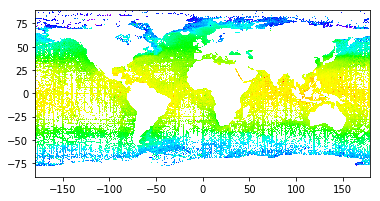

In [17]:
# have latGrid, lonGrid, and grid
# grid = grid.T
# grid = grid.T
plt.imshow(grid, extent=(lonGrid.min(), lonGrid.max(), latGrid.min(), latGrid.max()),
          interpolation='nearest', cmap=cm.gist_rainbow) #LRBT
plt.show()

# print(grid[38][15])


In [ ]:
# Fill numpy array for etopo
for lt in range(etopoLatSize):
    for ln in range(etopoLonSize):
#         print (latSize - lt - 1, end="\n")
        etopoGrid[etopoLatSize - lt - 1][ln] = rose[lt, ln]
#         print(lt, ln, grid[lt][ln])
# print(etopoGrid)


In [ ]:
plt.imshow(etopoGrid, extent=(etopoLonGrid.min(), etopoLonGrid.max(), etopoLatGrid.min(), etopoLatGrid.max()),
          interpolation='nearest', cmap=cm.gist_rainbow)
plt.show()

In [ ]:
def getO2(lat, lon, tol=0.5):
    print(lat, lon)
    O2 = 5.678
    return O2

In [ ]:
closestO2 = getO2(45, 45)
print(closestO2)
closestO2 = getO2(45, 45, tol=1.0)



In [ ]:
class O2Grid(object):
    _foundO2 = -99
    def __init__(self, filename): ##magic method
        self._file = filename
        
    def to_string(self):
        return self._file

In [ ]:
o2Obj = O2Grid("/Users/oz/Downloads/oxygen/netcdf/all/5deg/woa13_all_o00_5d.nc") 

In [ ]:
print(o2Obj._file)


In [ ]:
o2Obj.to_string()